# Support Vector Machines and Kernels

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [1]:
from __future__ import print_function
import os
#Please set the path below as per your system data folder location
# Since there were two datasets, we add a new column corresponding to the labels and combine them into one CSV file.
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine['Type'] = 1 # red wine
white_wine['Type'] = 0 # white wine
wines = [red_wine, white_wine]
data = pd.DataFrame()
data = pd.concat(wines)
data.to_csv('data.csv')

## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv', sep=',')
data.drop(data.columns[[0]],axis=1,inplace=True) # removing the first unnamed column (added during combining)
data = data.sample(frac=1).reset_index(drop=True)

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [4]:
y = data['Type'] # Target variable

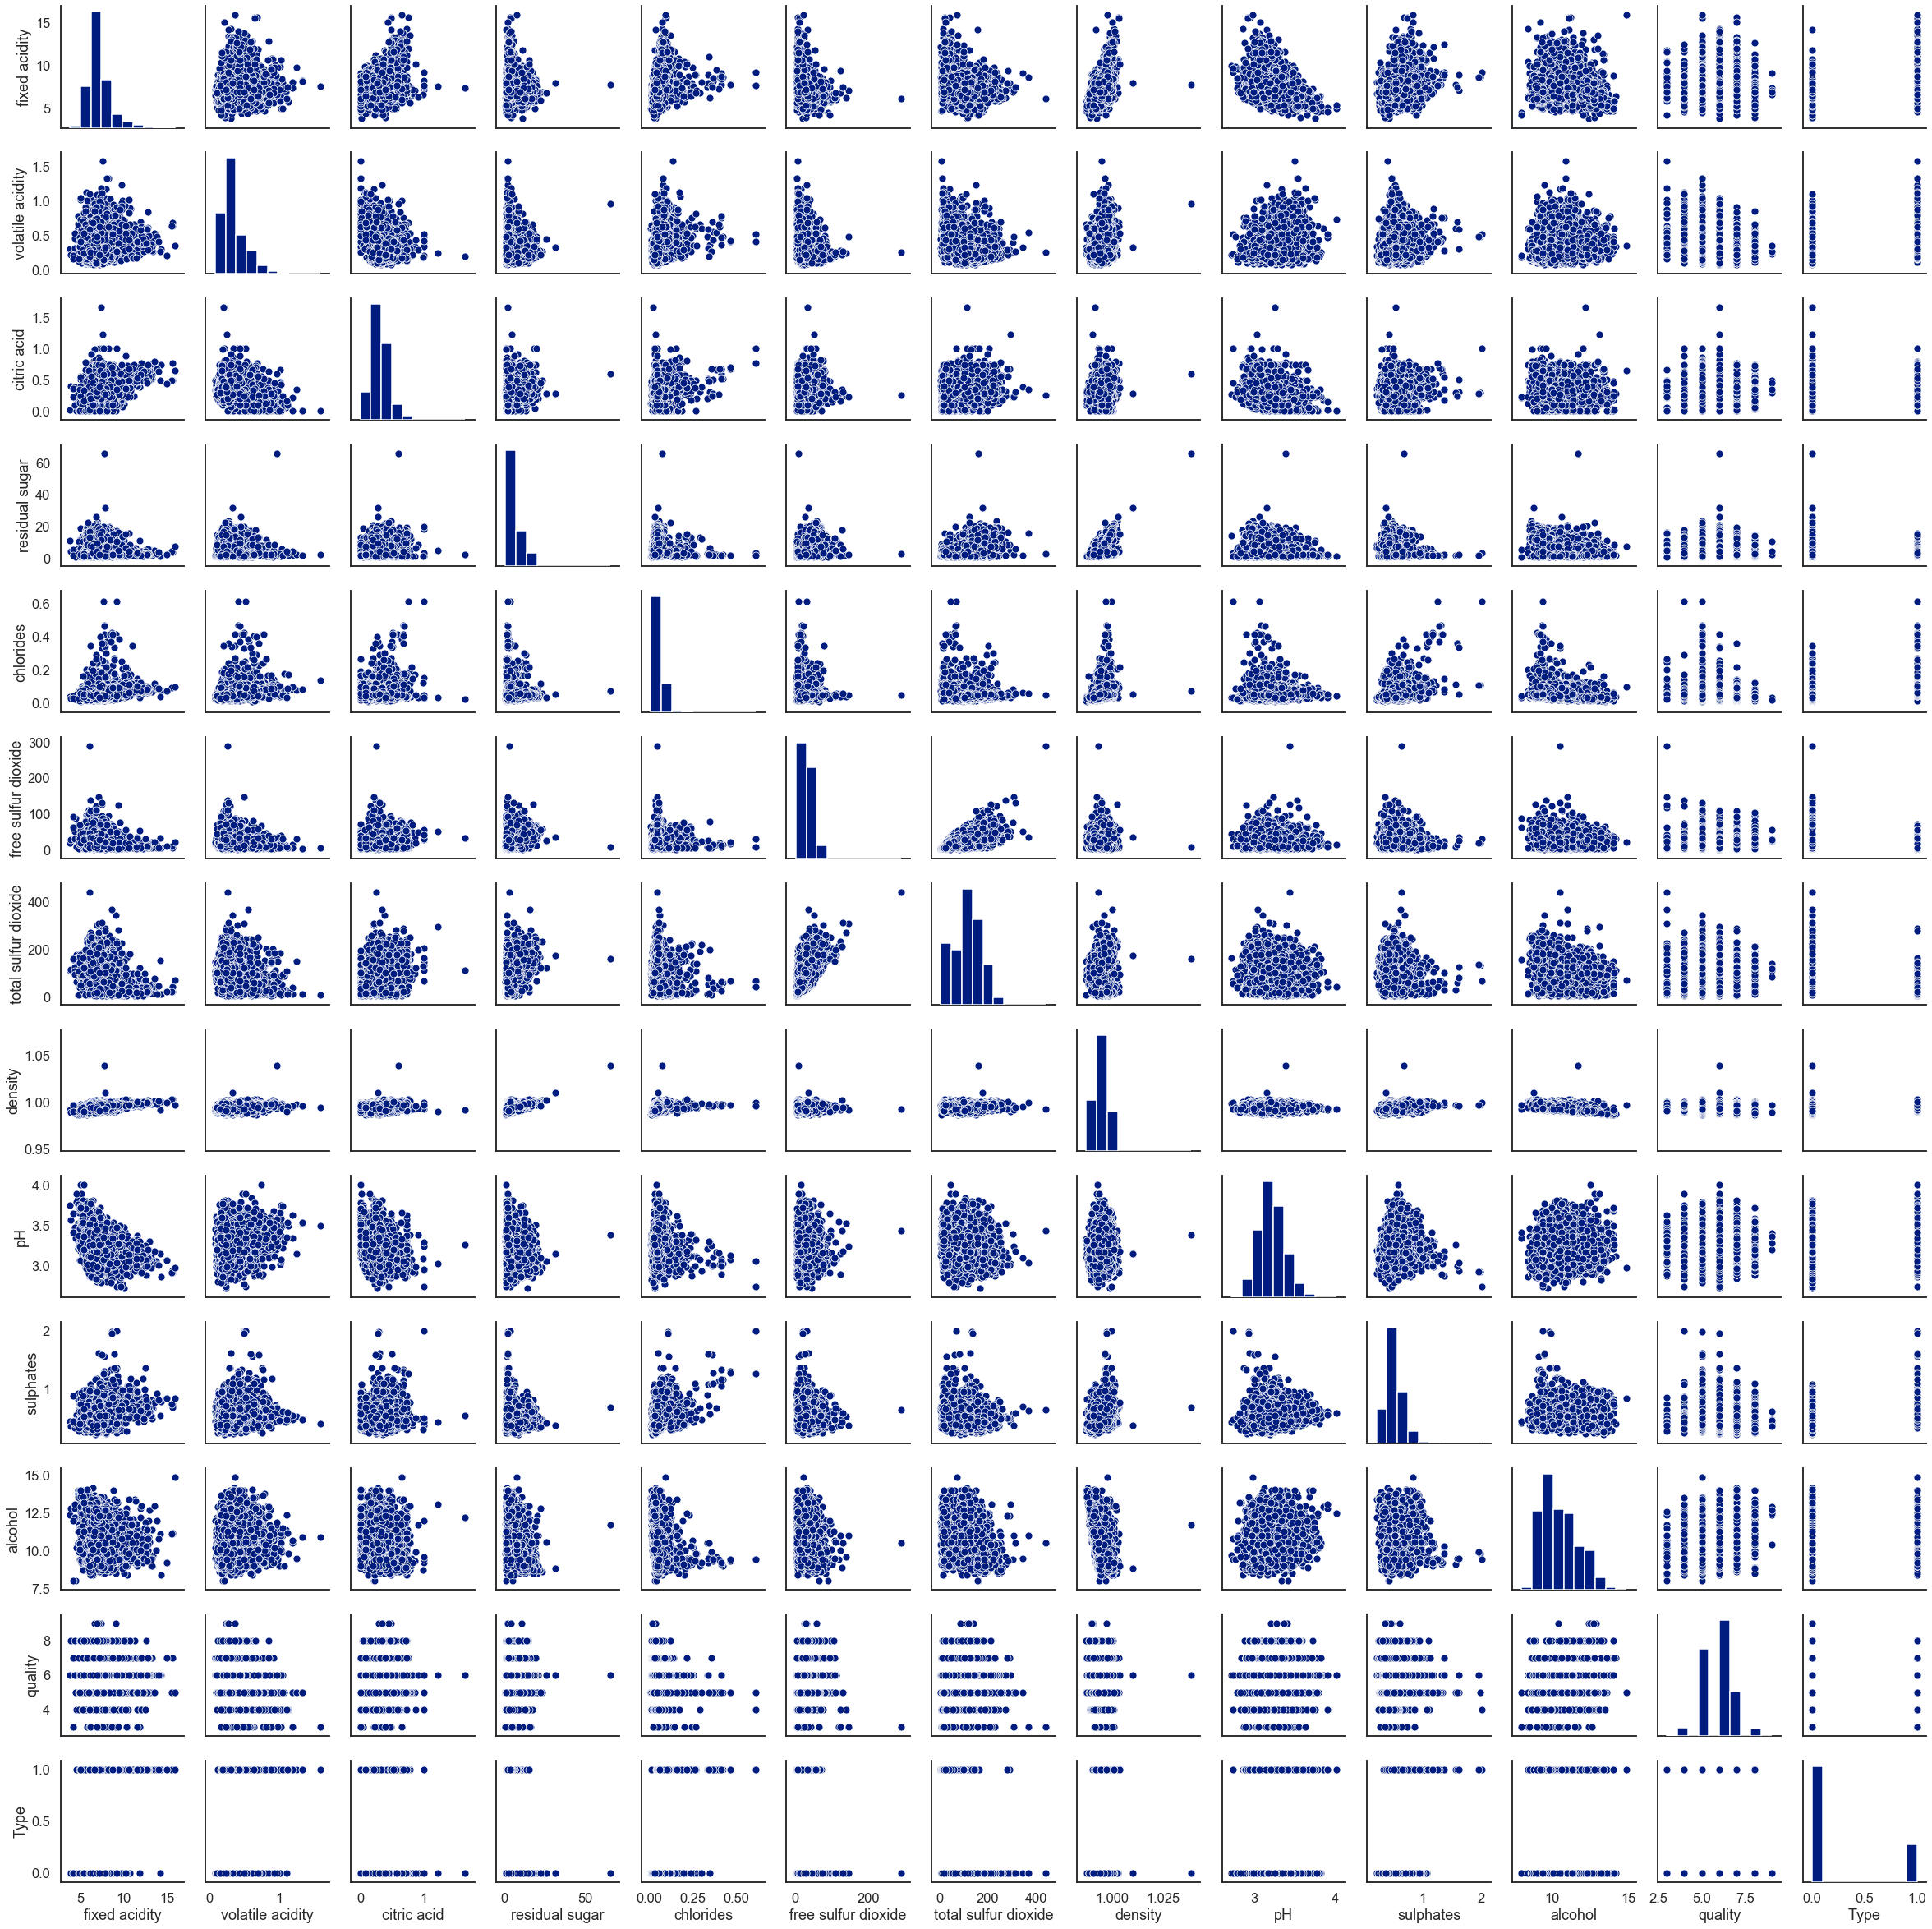

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(data)
plt.show()

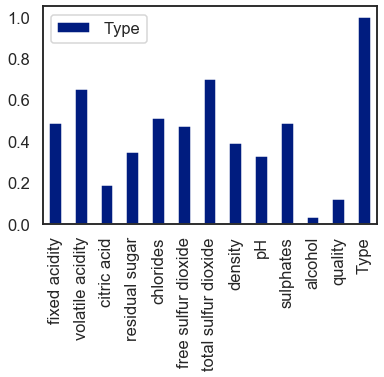

In [6]:
# Correlation bar graph
df_corr = data.corr().abs() # absolute to avoid the negatives. We discard the last column since it is label.
df_corr[['Type']].plot(kind='bar') # correlation between each column and y

In [7]:
correlation_index = data.corr().abs().unstack().sort_values().drop_duplicates()
corrDict = {}
for i,k in correlation_index.iteritems():
    corr1, corr2 = i
    toStr = '{} and {}'.format(corr1, corr2)
    if 'Type' not in toStr and k != 1:
        corrDict[toStr] = k
# Sorting the dictionary
sorted(corrDict.items(), key=lambda x: x[1])
print("The most two correlated X's are: ", list(corrDict.keys())[-1], \
      " with correlation value: ", corrDict[list(corrDict.keys())[-1]])

X = data[['total sulfur dioxide', 'free sulfur dioxide']]

The most two correlated X's are:  total sulfur dioxide and free sulfur dioxide  with correlation value:  0.720934081378521


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaledData = scaler.transform(X)
# Making a DataFrame again!
X = pd.DataFrame({'total sulfur dioxide': scaledData[:, 0], 'free sulfur dioxide': scaledData[:, 1]})#
print(X)

      total sulfur dioxide  free sulfur dioxide
0                 0.264977             0.114583
1                 0.235023             0.024306
2                 0.262673             0.079861
3                 0.437788             0.204861
4                 0.211982             0.086806
...                    ...                  ...
6492              0.211982             0.111111
6493              0.223502             0.076389
6494              0.274194             0.041667
6495              0.253456             0.076389
6496              0.221198             0.097222

[6497 rows x 2 columns]


## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

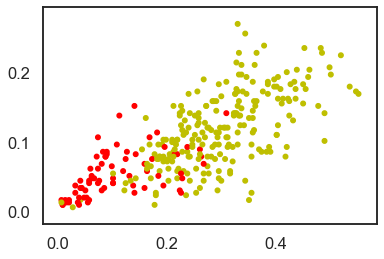

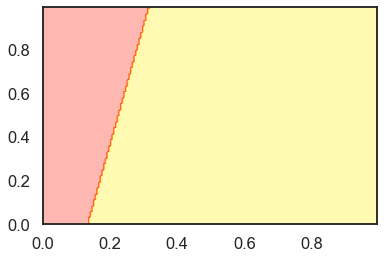

In [9]:
from sklearn.svm import LinearSVC
#X = X.sample(frac=1).reset_index(drop=True)

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.head(300)
y_color = y.head(300)

# Modifying the y vector have y for 0 and r for 1
y_color = y_color.replace(0, 'y')
y_color = y_color.replace(1, 'r')
plt.scatter(X_color['total sulfur dioxide'], X_color['free sulfur dioxide'], s=20, c=y_color)
plt.show()

# Decision Boundary
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
plt.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
plt.show()

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [10]:
def plot_decision_boundary(estimator, X, y):
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    plt.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    plt.show()

For Gamma: 0.5 and C: 0.1


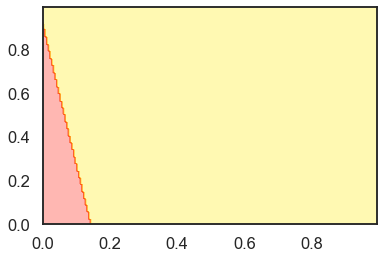

For Gamma: 0.5 and C: 1


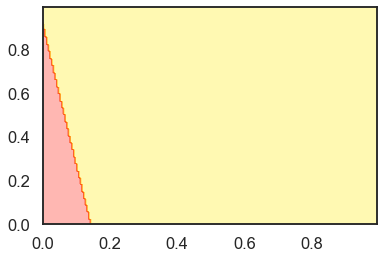

For Gamma: 0.5 and C: 10


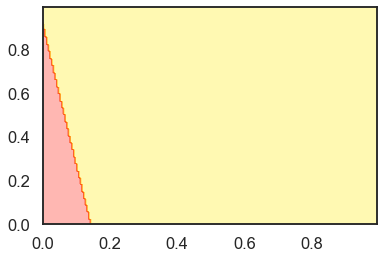

For Gamma: 1 and C: 0.1


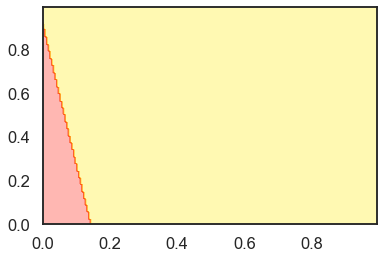

For Gamma: 1 and C: 1


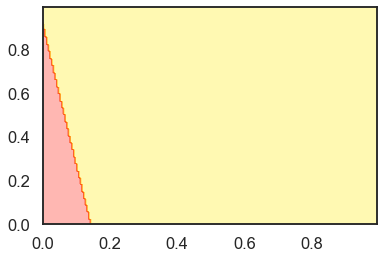

For Gamma: 1 and C: 10


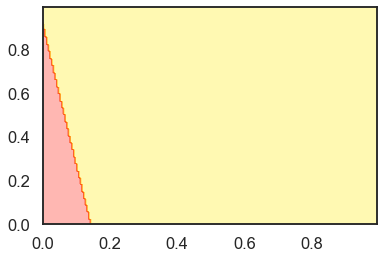

For Gamma: 2 and C: 0.1


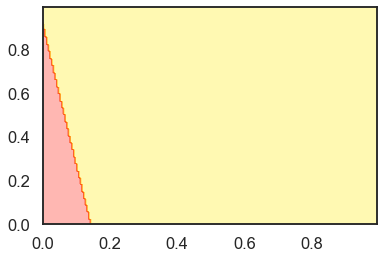

For Gamma: 2 and C: 1


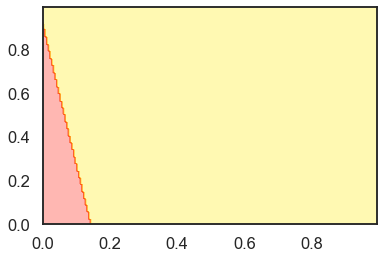

For Gamma: 2 and C: 10


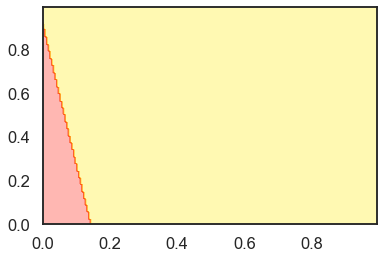

For Gamma: 10 and C: 0.1


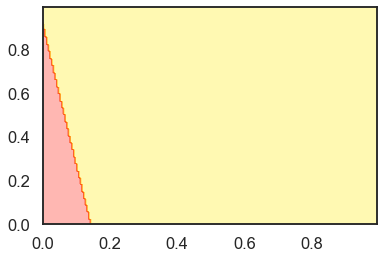

For Gamma: 10 and C: 1


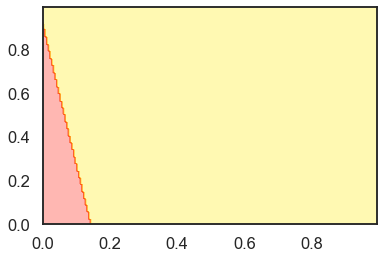

For Gamma: 10 and C: 10


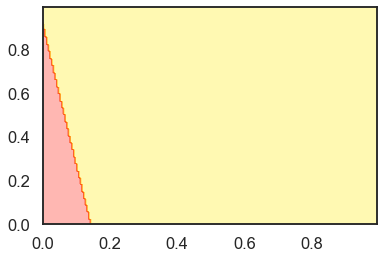

In [11]:
from sklearn.svm import SVC
Cs = [.1, 1, 10]
gammas = [.5, 1, 2, 10]
X_ = X.head(300)
y_ = y.head(300) 
for i in range(len(gammas)):
    for j in range(len(Cs)):
        print('For Gamma: {} and C: {}'.format(gammas[i], Cs[j]))
        clf = SVC(gamma=gammas[0], C = Cs[0])
        clf.fit(X, y)
        plot_decision_boundary(clf, X_, y_)

## Question 3A

Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.

* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC
* For various values of `C`, plot the decision boundary. You may try  
`Cs = [10,20,100,200]`
* Try to find out a C value that gives the best possible decision boundary

For C: 10


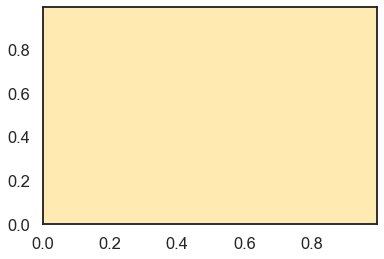

For C: 20


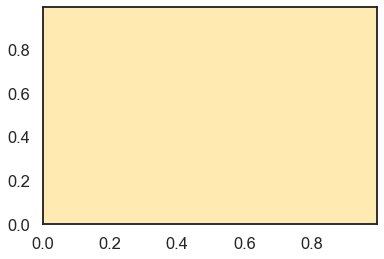

For C: 100


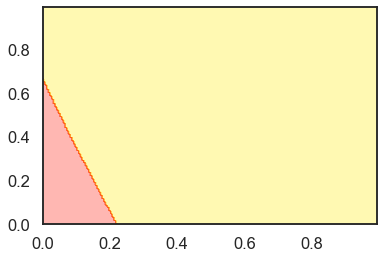

For C: 200


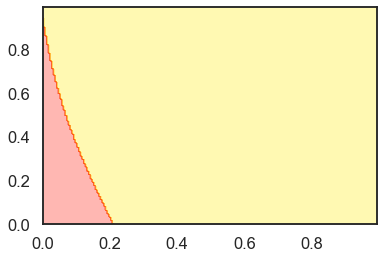

In [12]:
# Try with Polynomial kernel SVC
Cs = [10, 20, 100, 200]
for j in range(len(Cs)):
    print('For C: {}'.format(Cs[j]))
    clf = SVC(C=Cs[j], kernel='poly', degree=3, gamma='auto')
    clf.fit(X, y)
    plot_decision_boundary(clf, X, y)

## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [13]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Re-reading the wine data
data = pd.read_csv('data.csv', sep=',')
data.drop(data.columns[[0]],axis=1,inplace=True) # removing the first unnamed column (added during combining)
data = data.sample(frac=1).reset_index(drop=True)

# Creating X and Y
y = data['Type']
X = data[data.columns[:-1]]

In [ ]:
#%%timeit
# Time for fitting the RBF kernel
clf = SVC(kernel='poly', degree=3, gamma='auto')
clf.fit(X,y)

In [ ]:
%%timeit
feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                                 n_components=300)
data_transformed = feature_map_nystroem.fit_transform(data)

y = data['Type']
X = data[data.columns[:-1]]
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X, y)

In [ ]:
%timeit svc.fit(X2, y2)

In [ ]:
%%timeit


## Question 5
Try Tuning hyper-parameters for the svm kernal using GridSearchCV

* Take the complete dataset
* Define y as data.color = 'red'
* Remaining columns as X
* Do a test and train split
* Set parameters for cross validation. Do this for as many values of gamma and C
* Using gridsearchcv to run through the data using the various parameters values
* Get the mean and standard deviation on the set for the various combination of gamma and C values
* print the best parameters in the training set

In [ ]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



## Question 6
   Use the model from previous question to predict 
 
 * Perform the prediction on the test set  
 * Print confusion matrix, accuracy and classification report

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
